In [2]:
from tensorflow.keras.datasets import mnist
import tensorflow.keras.utils as utils # 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
# 데이터 셋
width = 28; height=28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test = X_test.reshape(10000, width*height).astype('float32')/255.0
Y_test = utils.to_categorical(y_test)
print('학습후 테스트 데이터 shape :',X_test.shape, Y_test.shape)

학습후 테스트 데이터 shape : (10000, 784) (10000, 10)


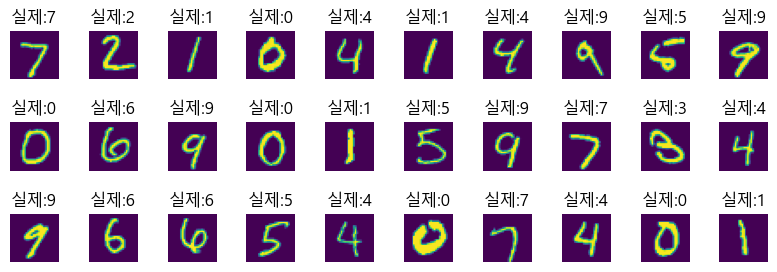

In [16]:
# 모델 학습 후 틀린 데이터 출력용(X_test와 Y_test)
plt_row = 3
plt_col = 10
# plt.figure(figsize=(plt_col, plt_row))
plt.rcParams['figure.figsize'] = (plt_col, plt_row)
plt.rc('font', family='Malgun Gothic') # 윈도우즈
fig, axarr = plt.subplots(nrows=plt_row, ncols=plt_col)
plt.subplots_adjust(hspace=0.9, wspace=0.2)
for i in range(plt_row * plt_col):
    sub_plot = axarr[i//plt_col, i%plt_col]
    sub_plot.imshow(X_test[i].reshape(width, height))
#     sub_plot.set_title('실제:' + str(y_test[i]))
    sub_plot.set_title('실제:'+str(Y_test[i].argmax()))
    sub_plot.axis('off')

(50000, 784) (50000, 10) (10000, 784) (10000, 10) (10000, 784) (10000, 10)
Epoch 1/300
1000/1000 [==============================] - 4s 3ms/step - loss: 0.2413 - accuracy: 0.9299 - val_loss: 0.1272 - val_accuracy: 0.9631
Epoch 2/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0922 - accuracy: 0.9725 - val_loss: 0.0869 - val_accuracy: 0.9721
Epoch 3/300
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0615 - accuracy: 0.9810 - val_loss: 0.0828 - val_accuracy: 0.9732
Epoch 4/300
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0474 - accuracy: 0.9850 - val_loss: 0.0833 - val_accuracy: 0.9745
Epoch 5/300
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0361 - accuracy: 0.9886 - val_loss: 0.1044 - val_accuracy: 0.9726
Epoch 6/300
1000/1000 [==============================] - 4s 4ms/step - loss: 0.0281 - accuracy: 0.9910 - val_loss: 0.0871 - val_accuracy: 0.9765
Epoch 7/300
1000/1000 [==============================] 

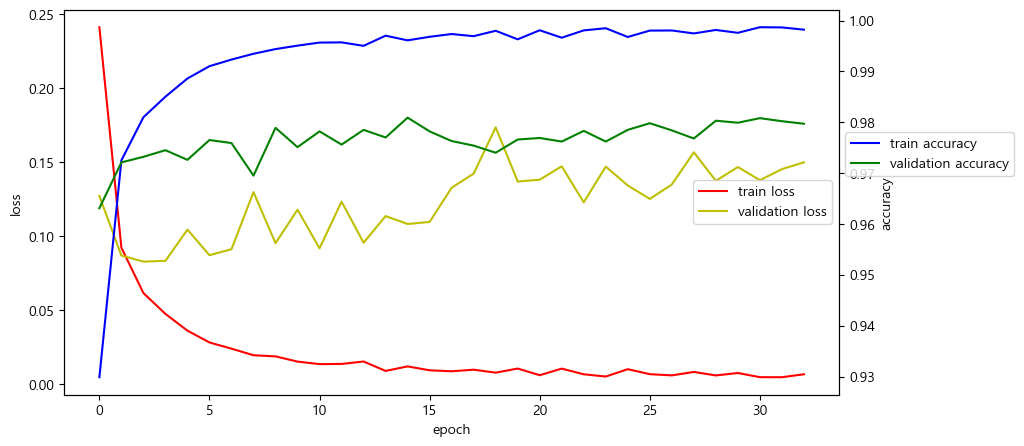

In [21]:
# 데이터 셋
width = 28; height=28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, width*height).astype('float32')/255.0
X_test = X_test.reshape(10000, width*height).astype('float32')/255.0

# 훈련셋, 검증셋, 테스트셋 = 50000:10000:그외
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

#원핫인코딩(onehot Encoding)
Y_train = utils.to_categorical(y_train)
Y_val = utils.to_categorical(y_val)
Y_test = utils.to_categorical(y_test)

print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)

# 모델 구성
model = Sequential()
model.add(Input(shape=(width * height, )))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 학습 과정 설정
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 학습 시키기
early_stop = EarlyStopping(patience=30)
hist = model.fit(X_train, Y_train,
                epochs=300,
                batch_size=50,
                validation_data=(X_val, Y_val),
                callbacks=[early_stop])

# 학습과정 살펴보기
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='validation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [24]:
# 모델 평가하기
loss, acc = model.evaluate(X_test, Y_test)
loss, acc

313/313 [==============================] - 1s 3ms/step - loss: 0.1324 - accuracy: 0.9819


(0.13241088390350342, 0.9818999767303467)

In [32]:
# 성능평가지표 = 교차표
yhat = model.predict(X_test).argmax(axis=1) # 예측치
# print('예측치 :',yhat)
# print('실제값 :', np.argmax(Y_test, axis=1))
print('실제값 :', y_test)
pd.crosstab(y_test, yhat)

313/313 [==============================] - 1s 2ms/step
실제값 : [7 2 1 ... 4 5 6]


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,973,1,0,0,0,0,2,1,2,1
1,0,1124,2,2,1,0,3,0,2,1
2,0,0,1014,5,1,0,4,5,3,0
3,0,0,3,995,0,3,0,3,2,4
4,1,0,3,0,970,0,4,0,0,4
5,2,0,0,10,1,870,6,0,2,1
6,5,2,1,0,2,2,945,0,1,0
7,0,0,6,1,3,0,0,1011,0,7
8,0,0,2,7,2,3,2,5,948,5


In [33]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(y_test, yhat)
cmatrix

array([[ 973,    1,    0,    0,    0,    0,    2,    1,    2,    1],
       [   0, 1124,    2,    2,    1,    0,    3,    0,    2,    1],
       [   0,    0, 1014,    5,    1,    0,    4,    5,    3,    0],
       [   0,    0,    3,  995,    0,    3,    0,    3,    2,    4],
       [   1,    0,    3,    0,  970,    0,    4,    0,    0,    4],
       [   2,    0,    0,   10,    1,  870,    6,    0,    2,    1],
       [   5,    2,    1,    0,    2,    2,  945,    0,    1,    0],
       [   0,    0,    6,    1,    3,    0,    0, 1011,    0,    7],
       [   0,    0,    2,    7,    2,    3,    2,    5,  948,    5],
       [   0,    3,    1,    5,   15,    8,    1,    4,    3,  969]],
      dtype=int64)

In [36]:
cnt = 0 # 실제값과 예측값이 다른 갯수
for i, row in enumerate(cmatrix):
    for j, data in enumerate(row):
        if i!=j:
            cnt += data
print('예측이 틀린 갯수 :', cnt)

예측이 틀린 갯수 : 181


In [38]:
# yhat : 예측치
# y_test : 실제값
cnt = 0
for y, h in zip(y_test, yhat):
    if y!=h:
        cnt += 1
print('예측이 틀린 갯수 :', cnt)

예측이 틀린 갯수 : 181


i =  3969
cnt =  100


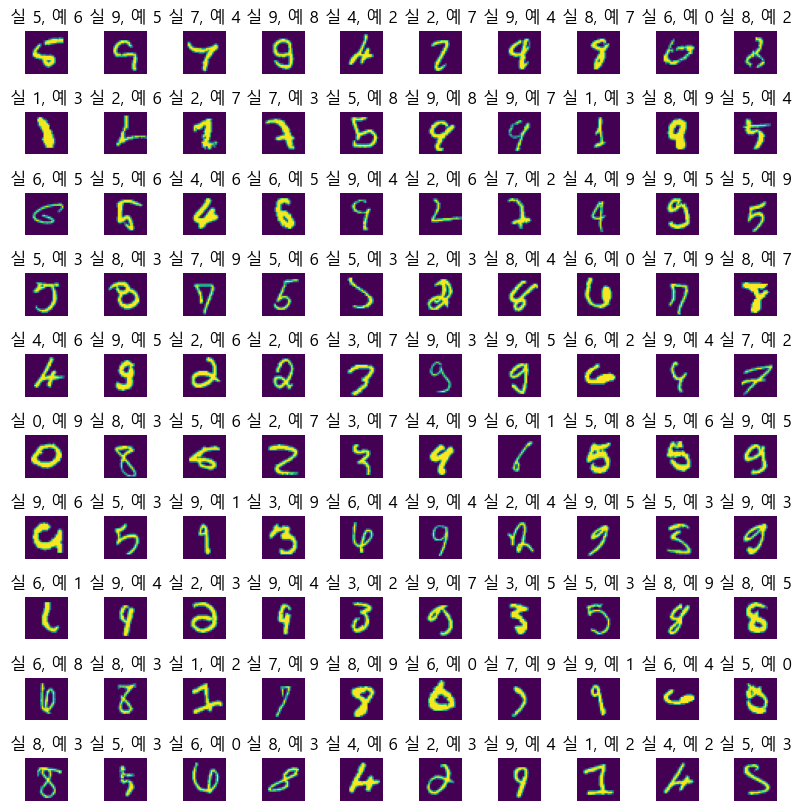

In [44]:
plt_row = 10
plt_col = 10
plt.rcParams['figure.figsize'] = (plt_col, plt_row)
plt.rc('font', family='Malgun Gothic') # 윈도우즈
fig, axarr = plt.subplots(nrows=plt_row, ncols=plt_col)
plt.subplots_adjust(hspace=0.9, wspace=0.2)

i = 0 # yhat과 y_test를 access할 index
cnt = 0 # 예측 실패 횟수
while(cnt < plt_row * plt_col) & (i < len(y_test)):
    # 예측 실패한 경우만 imshow(X_test[i]), 
    # 실제값(y_test)과 예측치(yhat)를 title에 출력
    if yhat[i] == y_test[i]:
        i += 1
        continue
    # 예측 실패한 경우
    sub_plot = axarr[cnt//plt_col, cnt%plt_col]
    sub_plot.imshow(X_test[i].reshape(width, height))
    title = 'R: {}, E: {}'.format(y_test[i], yhat[i])
    sub_plot.set_title(title)
    sub_plot.axis('off')
    i += 1
    cnt += 1
print('i =', i)
print('cnt =', cnt)

## CNN
- Convolution -> max pooling -> DNN (교안 35p)

In [51]:
# 데이터 셋
width = 28; height=28
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, width,height, 1).astype('float32')/255.0
X_test = X_test.reshape(10000, width,height, 1).astype('float32')/255.0

# 훈련셋, 검증셋, 테스트셋 = 50000:10000:그외
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

#원핫인코딩(onehot Encoding)
Y_train = utils.to_categorical(y_train)
Y_val = utils.to_categorical(y_val)
Y_test = utils.to_categorical(y_test)

print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)

# 모델 생성
# Conv(필터 3*3 사이즈 / 커널 32개) 28*28 -> 계산식 (28-3+1) 26*26*32
# MaxPooling (2*2 사이즈) 13*13*32
# Dropout
# Conv(3*3 사이즈 / 커널 64개) 11*11*32*64
# MaxPooling (2*2 사이즈) 6*6*32*64
# 1차원 데이터로 만들기 
# DNN (hidden layer 128 units 한층 - output layer)
model = Sequential()
model.add(Conv2D(32, # 커널 갯수
                3, # 커널 사이즈
                padding='same', # 입력층과 출력층의 갯수를 같게 ( 외곽에 의미 없는 값으로 채움)
                activation='relu',
                input_shape=(width, height, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(64,
                3,
                activation='relu',
                input_shape=(width, height, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,
               activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10,
               activation='softmax'))
model.summary()


(50000, 28, 28, 1) (50000, 10) (10000, 28, 28, 1) (10000, 10) (10000, 28, 28, 1) (10000, 10)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_11 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                           

In [53]:
# 학습설정
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
# 학습시키기
earlystop = EarlyStopping(patience=20)
hist = model.fit(X_train, Y_train,
                epochs=50,
                batch_size=32,
                validation_data=(X_val, Y_val),
                callbacks=[earlystop])

Epoch 1/50
1563/1563 [==============================] - 11s 5ms/step - loss: 0.2298 - accuracy: 0.9279 - val_loss: 0.0596 - val_accuracy: 0.9826
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0827 - accuracy: 0.9750 - val_loss: 0.0392 - val_accuracy: 0.9888
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0631 - accuracy: 0.9806 - val_loss: 0.0361 - val_accuracy: 0.9904
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0540 - accuracy: 0.9834 - val_loss: 0.0377 - val_accuracy: 0.9896
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0463 - accuracy: 0.9859 - val_loss: 0.0297 - val_accuracy: 0.9914
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0415 - accuracy: 0.9874 - val_loss: 0.0361 - val_accuracy: 0.9915
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.0359 - accuracy: 0.9883 - val_loss: 0.0314 - val_accuracy

In [54]:
model.save('model/mnist_cnn.h5')

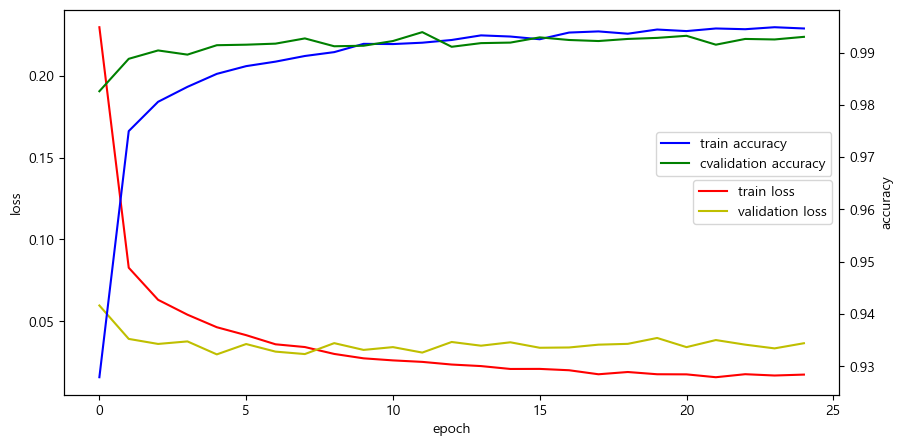

In [55]:
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'y', label='validation loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='cvalidation accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.7))
plt.show()

In [56]:
loss, accuracy = model.evaluate(X_val, Y_val)
loss, accuracy

313/313 [==============================] - 1s 3ms/step - loss: 0.0366 - accuracy: 0.9930


(0.03656192496418953, 0.9929999709129333)

In [57]:
# 예측치와 실제값을 이용해서 교차표 
yhat = model.predict(X_test).argmax(axis=1)
yhat

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [58]:
cnt = 0
for y, h in zip(y_test, yhat):
    if y!=h:
        cnt +=1
print('예측이 틀린 갯수 :', cnt)

예측이 틀린 갯수 : 65


i = 10000
cnt = 65


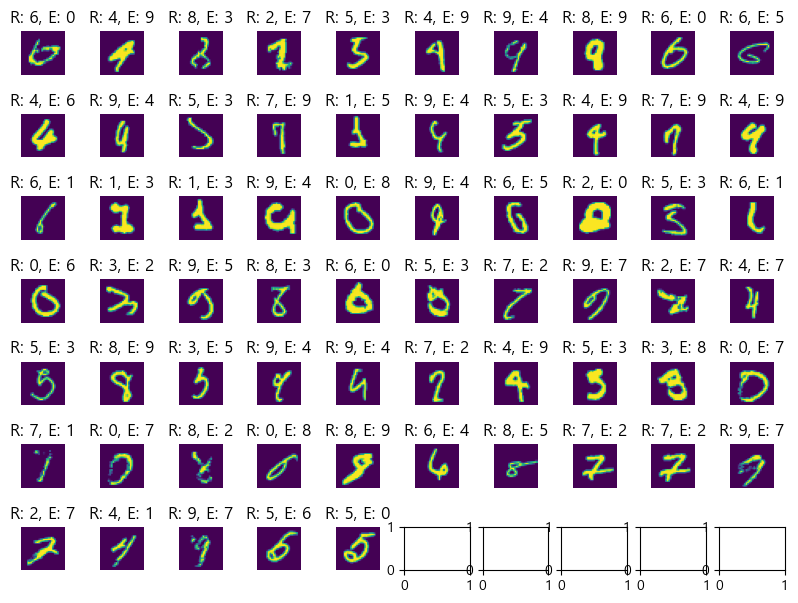

In [60]:
plt_row = 7
plt_col = 10
plt.rcParams['figure.figsize'] = (plt_col, plt_row)
plt.rc('font', family='Malgun Gothic') # 윈도우즈
fig, axarr = plt.subplots(nrows=plt_row, ncols=plt_col)
plt.subplots_adjust(hspace=0.9, wspace=0.2)

i = 0 # yhat과 y_test를 access할 index
cnt = 0 # 예측 실패 횟수
while(cnt < plt_row * plt_col) & (i < len(y_test)):
    # 예측 실패한 경우만 imshow(X_test[i]), 
    # 실제값(y_test)과 예측치(yhat)를 title에 출력
    if yhat[i] == y_test[i]:
        i += 1
        continue
    # 예측 실패한 경우
    sub_plot = axarr[cnt//plt_col, cnt%plt_col]
    sub_plot.imshow(X_test[i].reshape(width, height))
    title = 'R: {}, E: {}'.format(y_test[i], yhat[i])
    sub_plot.set_title(title)
    sub_plot.axis('off')
    i += 1
    cnt += 1
print('i =', i)
print('cnt =', cnt)